# STAT8017 2019 sem1 Assignment 1

In [91]:
%matplotlib inline
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz


Q1

1a)

In [117]:
df = pd.read_csv("Churn_Modelling.csv", index_col=[1])
del df['RowNumber']
del df['Surname']

df.Gender[df.Gender == 'Male'] = 1
df.Gender[df.Gender == 'Female'] = 0
df.sample(10)

C:\Users\michi\Anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\michi\Anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15774262,597,Germany,1,52,8,83693.34,2,1,1,161083.53,0
15677610,511,Germany,0,41,8,153895.65,1,1,1,39087.42,0
15777586,784,Spain,0,42,2,109052.04,2,1,0,6409.55,0
15588859,496,Spain,0,44,0,179356.28,2,1,0,2919.21,1
15723216,623,Germany,1,33,2,80002.33,1,1,1,104079.62,0
15581388,487,Spain,1,33,8,145729.71,1,1,0,41365.85,0
15606273,616,France,1,37,5,144235.73,2,0,0,154957.66,1
15574761,466,France,0,41,3,33563.95,2,1,0,178994.13,1
15595135,778,Germany,0,29,7,123229.46,1,1,0,181221.09,0


1c) - 1d)

In [118]:
expl = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
#expl = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
x = df[expl]
y = df[['Exited']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CustomerId,,,,,,,,,
15634602,619,0,42,2,0.00,1,1,1,101348.88
15647311,608,0,41,1,83807.86,1,0,1,112542.58
15619304,502,0,42,8,159660.80,3,1,0,113931.57
15701354,699,0,39,1,0.00,2,0,0,93826.63
15737888,850,0,43,2,125510.82,1,1,1,79084.10


In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

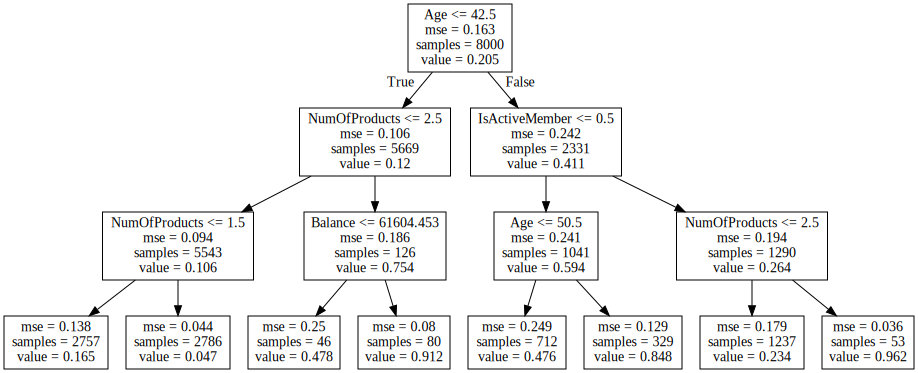

In [120]:
dot_graph = export_graphviz(dtr, 
                             out_file=None, 
                             feature_names=x_train.columns)
tree_graph = graphviz.Source(dot_graph)
tree_graph

The assessment of training ($R^{2}$):

In [121]:
print(dtr.score(x_train, y_train))

0.2591006923019348


1e)

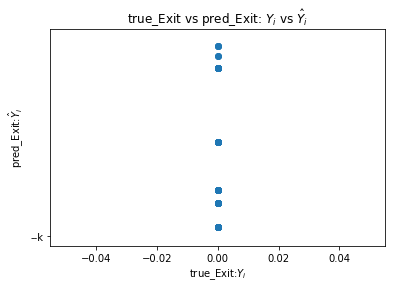

mean squared error: 0.11367992373497302
mean absolute error 0.23198762346242646
R_square: 0.2881646731759253
R_square: 0.2881646731759253


In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred_test = dtr.predict(x_test)
plt.scatter(y_test, pred_test, label='HSI')
plt.plot( '--k', transform=plt.gca().transAxes)

plt.xlabel('true_Exit:$Y_i$')
plt.ylabel('pred_Exit:$\hat{Y}_i$')
plt.title("true_Exit vs pred_Exit: $Y_i$ vs $\hat{Y}_i$")
plt.show()

print('mean squared error:', mean_squared_error(y_test, pred_test))
print('mean absolute error', mean_absolute_error(y_test, pred_test))
print('R_square:', dtr.score(x_test, y_test))
print('R_square:', r2_score(y_test, pred_test))

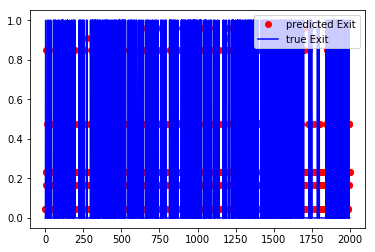

In [123]:
plt.plot(range(len(y_test)), pred_test, label='predicted Exit', c='red', linewidth=0, marker="o")
plt.plot(range(len(y_test)), y_test, label='true Exit', c='blue')
plt.legend(loc='upper right')
plt.show()

Q2

2a) imputation

In [124]:
df.isnull().values.any()

False

2b) lasso

In [125]:
from sklearn.linear_model import LinearRegression, Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(x, y)
lasso.coef_

array([-9.66657933e-05, -3.80307844e-02,  1.11170583e-02, -5.84045587e-04,
        7.07230481e-07, -0.00000000e+00, -0.00000000e+00, -1.03491992e-01,
        7.65552771e-08])

2c) Stepwise regression

In [126]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(x, y)
print('resulting features:')
print(result)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Q3

3a)

In [138]:
mydata = df

mydata.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [139]:
x = mydata.loc[:, expl]
y = mydata.loc[:, "Exited"]
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CustomerId,,,,,,,,,
15634602,619,0,42,2,0.00,1,1,1,101348.88
15647311,608,0,41,1,83807.86,1,0,1,112542.58
15619304,502,0,42,8,159660.80,3,1,0,113931.57
15701354,699,0,39,1,0.00,2,0,0,93826.63
15737888,850,0,43,2,125510.82,1,1,1,79084.10


3b) Standardizing and Split the data into training and testing sets

In [140]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
sx = scaler_x.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(sx, y, test_size=0.5, random_state=0)

3c) Build a logistic regression model

In [141]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_train_lr = lr.predict_proba(x_train)
pred_test_lr = lr.predict_proba(x_test)

C:\Users\michi\Anaconda3\envs\tfenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3d) Build a decistion tree model

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
base = DecisionTreeClassifier()
grid = GridSearchCV(base, param_grid={'max_depth': (2, 4, 6, 8, 10), 'min_samples_leaf': [5, 10, 15, 20]}, cv=10)
grid.fit(x_train, y_train)
dtc = grid.best_estimator_
pred_train_dtc = dtc.predict_proba(x_train)
pred_test_dtc = dtc.predict_proba(x_test)

3e) Classification accuracy

In [143]:
from sklearn.metrics import accuracy_score
acc_train_lr = accuracy_score(y_train, np.argmax(pred_train_lr, 1))
acc_train_dtc = accuracy_score(y_train, np.argmax(pred_train_dtc, 1))

acc_test_lr = accuracy_score(y_test, np.argmax(pred_test_lr, 1))
acc_test_dtc = accuracy_score(y_test, np.argmax(pred_test_dtc, 1))

print("LR: Training ACC:", round(acc_train_lr, 5), "Testing ACC:", round(acc_test_lr, 5))
print("DTC: Training ACC:", round(acc_train_dtc, 5), "Testing ACC:", round(acc_test_dtc, 5))

LR: Training ACC: 0.809 Testing ACC: 0.802
DTC: Training ACC: 0.85 Testing ACC: 0.848


3f) Confusion matrix

In [144]:
from sklearn.metrics import confusion_matrix
cnf_train_lr = confusion_matrix(y_test, np.argmax(pred_test_lr, 1))
cnf_train_dtc = confusion_matrix(y_test, np.argmax(pred_test_dtc, 1))
print("Logistic regression: \n", cnf_train_lr)
print("Decision tree: \n",cnf_train_dtc)

Logistic regression: 
 [[3866  100]
 [ 890  144]]
Decision tree: 
 [[3816  150]
 [ 610  424]]


Remark: from the confusion matrix, it can be observed that all the samples are predicted to be 'up' by Logistic Regression (LogR). And that is also the reason why LogR has higher testing accuracy than DTC, in 3e).

3g) ROC curve

In [145]:
from sklearn.metrics import roc_curve, auc

lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_test_lr[:, 1])
lr_roc_auc = auc(lr_fpr, lr_tpr)

dtc_fpr, dtc_tpr, _ = roc_curve(y_test, pred_test_dtc[:, 1])
dtc_roc_auc = auc(dtc_fpr, dtc_tpr)

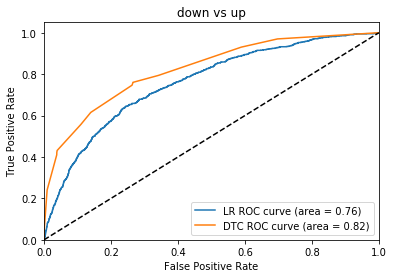

In [146]:
plt.figure()
plt.plot(lr_fpr, lr_tpr, label='LR ROC curve (area = %0.2f)' % lr_roc_auc)
plt.plot(dtc_fpr, dtc_tpr, label='DTC ROC curve (area = %0.2f)' % dtc_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("down"+ " vs up")
plt.legend(loc="lower right")
plt.show()

Q4

In [147]:
import scipy as sp

def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), sp.stats.sem(data)
    h = se * sp.stats.t._ppf((1 + confidence) / 2., n - 1)
    return m - h, m + h

In [148]:
result = mean_confidence_interval(np.array([45, 87, 14, 25, 19, 78]))
print("95% CI =", result)

95% CI = (11.84991198994964, 77.4834213433837)
